#Analise Financeira

O objetivo deste mini-projeto é unir duas poderosas ferramentas de análise de dados para resolver um problema de negócio: Linguagem SQL será usada para análise exploratória de dados através do pacote sqldf e Linguagem R será usada para análise estatística.

###**Problema de Negócio:**

Uma rede de hospitais gostaria de compreender as variáveis relacionadas aosgastoscom internações hospitalares de pacientes.Usaremos  dados  de  uma pesquisa  nacional  de  custos  hospitalares  realizada  pela  US Agency  for  Healthcare que consiste  em  registros  hospitalares  de  amostras  de  pacientes internados. Os dados fornecidos são restritos à cidade de Wisconsin e referem-se a pacientes na faixa etária de 0 a 17 anos.

Vamos separar o trabalho em duas etapas. Na etapa 1 vamos explorar os dados usando Linguagem  SQL  e  responder  10  perguntas  de  negócio.  Na  etapa  2  vamos  realizar  análise estatística com Linguagem R através do Teste ANOVA e Regressão Linear e responder 7 perguntas de negócio.


###**Dicionário de dados:**
- AGE: Idade do paciente
- FEMALE: Variável binária que indica se o paciente é do sexo feminino
-LOS: (Length of stay) Tempo da internação do paciente
- RACE: Raça do paciente
-TOTCHG: Custo da internação
- APRDRG: Grupo de diagnóstico refinado do paciente

>**Referências:** Formação Cientista de dados (Data Science Academy: https://www.datascienceacademy.com.br)

In [ ]:
# Configurações de saídas
options(scipen = 999, digits = 2)
options(repos = "http://cran.rstudio.com/")
options(repr.plot.width = 20, repr.plot.height = 10)

In [ ]:
if(!require(pacman)) install.packages('pacman')
library('pacman')
pacman::p_load(dplyr, ggplot2, sqldf)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’



sqldf installed

Warning message:
“no DISPLAY variable so Tk is not available”


In [ ]:
# Lendo o dataset
df <- read.csv('/content/dataset.csv')

In [ ]:
# Alterando as labels

novos_rotulos <- c('Idade','éFeminino','TempoInternacao','Raca','Custo',
                    'GrupoDiagnostico')
colnames(df) <- novos_rotulos

In [ ]:
# Visualizando as primeiras linhas
head(df)

,Idade,éFeminino,TempoInternacao,Raca,Custo,GrupoDiagnostico
,<int>,<int>,<int>,<int>,<int>,<int>
1,17,1,2,1,2660,560
2,17,0,2,1,1689,753
3,17,1,7,1,20060,930
4,17,1,1,1,736,758
5,17,1,1,1,1194,754
6,17,0,0,1,3305,347


In [ ]:
# Dimensões
dim(df)

[1] 500   6

In [ ]:
# Tipos de dados
str(df)

'data.frame':	500 obs. of  6 variables:
 $ Idade           : int  17 17 17 17 17 17 17 16 16 17 ...
 $ éFeminino       : int  1 0 1 1 1 0 1 1 1 1 ...
 $ TempoInternacao : int  2 2 7 1 1 0 4 2 1 2 ...
 $ Raca            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Custo           : int  2660 1689 20060 736 1194 3305 2205 1167 532 1363 ...
 $ GrupoDiagnostico: int  560 753 930 758 754 347 754 754 753 758 ...


In [ ]:
# Verificando os valores ausentes
sum(is.na(df))

[1] 1

In [ ]:
# Verificando o sumário das variáveis
summary(df)

     Idade        éFeminino    TempoInternacao      Raca         Custo      
 Min.   : 0.0   Min.   :0.00   Min.   : 0      Min.   :1.0   Min.   :  532  
 1st Qu.: 0.0   1st Qu.:0.00   1st Qu.: 2      1st Qu.:1.0   1st Qu.: 1216  
 Median : 0.0   Median :1.00   Median : 2      Median :1.0   Median : 1536  
 Mean   : 5.1   Mean   :0.51   Mean   : 3      Mean   :1.1   Mean   : 2774  
 3rd Qu.:13.0   3rd Qu.:1.00   3rd Qu.: 3      3rd Qu.:1.0   3rd Qu.: 2530  
 Max.   :17.0   Max.   :1.00   Max.   :41      Max.   :6.0   Max.   :48388  
                                               NA's   :1                    
 GrupoDiagnostico
 Min.   : 21     
 1st Qu.:640     
 Median :640     
 Mean   :616     
 3rd Qu.:751     
 Max.   :952     
                 

In [ ]:
# Removendo a linha NA
df <- na.omit(df)
summary(df)

     Idade        éFeminino    TempoInternacao      Raca         Custo      
 Min.   : 0.0   Min.   :0.00   Min.   : 0      Min.   :1.0   Min.   :  532  
 1st Qu.: 0.0   1st Qu.:0.00   1st Qu.: 2      1st Qu.:1.0   1st Qu.: 1218  
 Median : 0.0   Median :1.00   Median : 2      Median :1.0   Median : 1538  
 Mean   : 5.1   Mean   :0.51   Mean   : 3      Mean   :1.1   Mean   : 2778  
 3rd Qu.:13.0   3rd Qu.:1.00   3rd Qu.: 3      3rd Qu.:1.0   3rd Qu.: 2530  
 Max.   :17.0   Max.   :1.00   Max.   :41      Max.   :6.0   Max.   :48388  
 GrupoDiagnostico
 Min.   : 21     
 1st Qu.:640     
 Median :640     
 Mean   :616     
 3rd Qu.:751     
 Max.   :952     

Categóricas

*   éFeminino (binária)
*   Raça
*   GrupoDiagnostico

Numéricas


*   Idade
*   TempoInternacao
*   Custo





### Proposta de Solução (SQL)

Responder as perguntas de negócios utilizando linguagem SQL

1.   Quantas raças estão representadas no dataset?
2.   Qual a idade média dos pacientes?
3.   Qual a moda da idade dos pacientes?
4.   Qual a variância da coluna idade?
5.   Qual o gasto total com internações hospitalares por idade?
6.   Qual idade gera o maior gasto total com internações hospitalares?
7.   Qual o gasto total com internações hospitalares por gênero?
8.   Qual a média de gasto com internações hospitalares por raça do paciente?
9.   Para  pacientes  acima  de  10  anos,  qual  a  média  de  gasto  total  com  internações hospitalares?
10.  Considerando o item anterior, qual idade tem média de gastos superior a 3000?

In [ ]:
colnames(df)

[1] "Idade"            "éFeminino"        "TempoInternacao"  "Raca"            
[5] "Custo"            "GrupoDiagnostico"

In [ ]:
# 1. Quantas raças estão representadas no dataset?
sqldf("SELECT
        Raca,
        COUNT(Raca) AS 'Raça'
        FROM df
        GROUP BY Raca"
        )

Raca,Raça
<int>,<int>
1,484
2,6
3,1
4,3
5,3
6,2


In [ ]:
# 2. Qual a idade média dos pacientes?
sqldf("SELECT
        AVG(Idade) AS 'Média_Idade'
        FROM df"
        )

Média_Idade
<dbl>
5.1


In [ ]:
# 3. Qual a moda da idade dos pacientes?
sqldf("SELECT
        Idade,
        COUNT(Idade) AS 'Total'
        FROM df
        GROUP BY Idade
        ORDER BY Total DESC
        LIMIT 1"
        )

Idade,Total
<int>,<int>
0,306


In [ ]:
# 4. Qual a variância da coluna idade?
sqldf("SELECT
        AVG((Idade - (SELECT AVG(Idade) FROM df))*(Idade - (SELECT AVG(Idade) FROM df))) AS 'Variância'
        FROM df"
        )

Variância
<dbl>
48


In [ ]:
# 5. Qual o gasto total com internações hospitalares por idade?
sqldf("SELECT
        Idade,
        SUM(Custo) AS 'Gasto_total'
        FROM df
        GROUP BY Idade"
        )

Idade,Gasto_total
<int>,<int>
0,676962
1,37744
2,7298
3,30550
4,15992
5,18507
6,17928
7,10087
8,4741


In [ ]:
# 6. Qual idade gera o maior gasto total com internações hospitalares?
sqldf("SELECT
        Idade,
        SUM(Custo) AS 'Gasto_total'
        FROM df
        GROUP BY Idade
        ORDER BY Gasto_total DESC
        LIMIT 3"
        )

Idade,Gasto_total
<int>,<int>
0,676962
17,174777
15,111747


In [ ]:
# 7. Qual o gasto total com internações hospitalares por gênero?
sqldf("SELECT
        IIF(éFeminino = 1, 'Feminino','Masculino') AS 'Gênero',
        SUM(Custo) AS 'Gasto_total'
        FROM df
        GROUP BY Gênero"
        )

Gênero,Gasto_total
<chr>,<int>
Feminino,650647
Masculino,735391


In [ ]:
# 8. Qual a média de gasto com internações hospitalares por raça do paciente?
sqldf("SELECT
        Raca AS 'Raça',
        AVG(Custo) AS 'Gasto_médio',
        ROUND((AVG(Custo)/SUM(AVG(Custo))OVER() * 100),2) AS 'Percentual'
        FROM df
        GROUP BY Raça"
        )

Raça,Gasto_médio,Percentual
<int>,<dbl>,<dbl>
1,2773,17.6
2,4202,26.7
3,3041,19.3
4,2345,14.9
5,2027,12.9
6,1349,8.6


In [ ]:
# 9. Para pacientes acima de 10 anos, qual a média de gasto total com internações hospitalares?
sqldf("SELECT
        AVG(Custo) AS 'Gasto_médio'
        FROM df
        WHERE Idade > 10"
        )

Gasto_médio
<dbl>
3214


In [ ]:
# 10. Considerando o item anterior, qual idade tem média de gastos superior a 3000?
sqldf("SELECT
        Idade,
        AVG(Custo) AS 'Gasto_médio'
        FROM df
        GROUP BY Idade
        HAVING AVG(Custo) > 3000
        ORDER BY Idade ASC"
        )

Idade,Gasto_médio
<int>,<dbl>
1,3774
2,7298
3,10183
4,7996
5,9254
6,8964
7,3362
9,10574
10,6117


### Proposta de Solução (Análise Estatística)

Responder as perguntas de negócios utilizando análise estatística:

1.   Qual a distribuição da idade dos pacientes que frequentam o hospital?
2.   Qual faixa etária tem o maior gasto total no hospital?
3.   Qual grupo baseado em diagnóstico (Aprdrg) tem o maior gasto total no hospital?
4.   A raça do paciente tem relação com o total gasto em internações no hospital?
5.   A combinação de idade e gênero dos pacientes influencia no gasto total em internações no hospital?
6.   Como o tempo de permanência é o fator crucial para pacientes internados, desejamos descobrir se o tempo de permanência pode ser previsto a partir de idade, gênero e raça.
7.   Quais variável têm maior impacto nos custos de internação hospitalar?

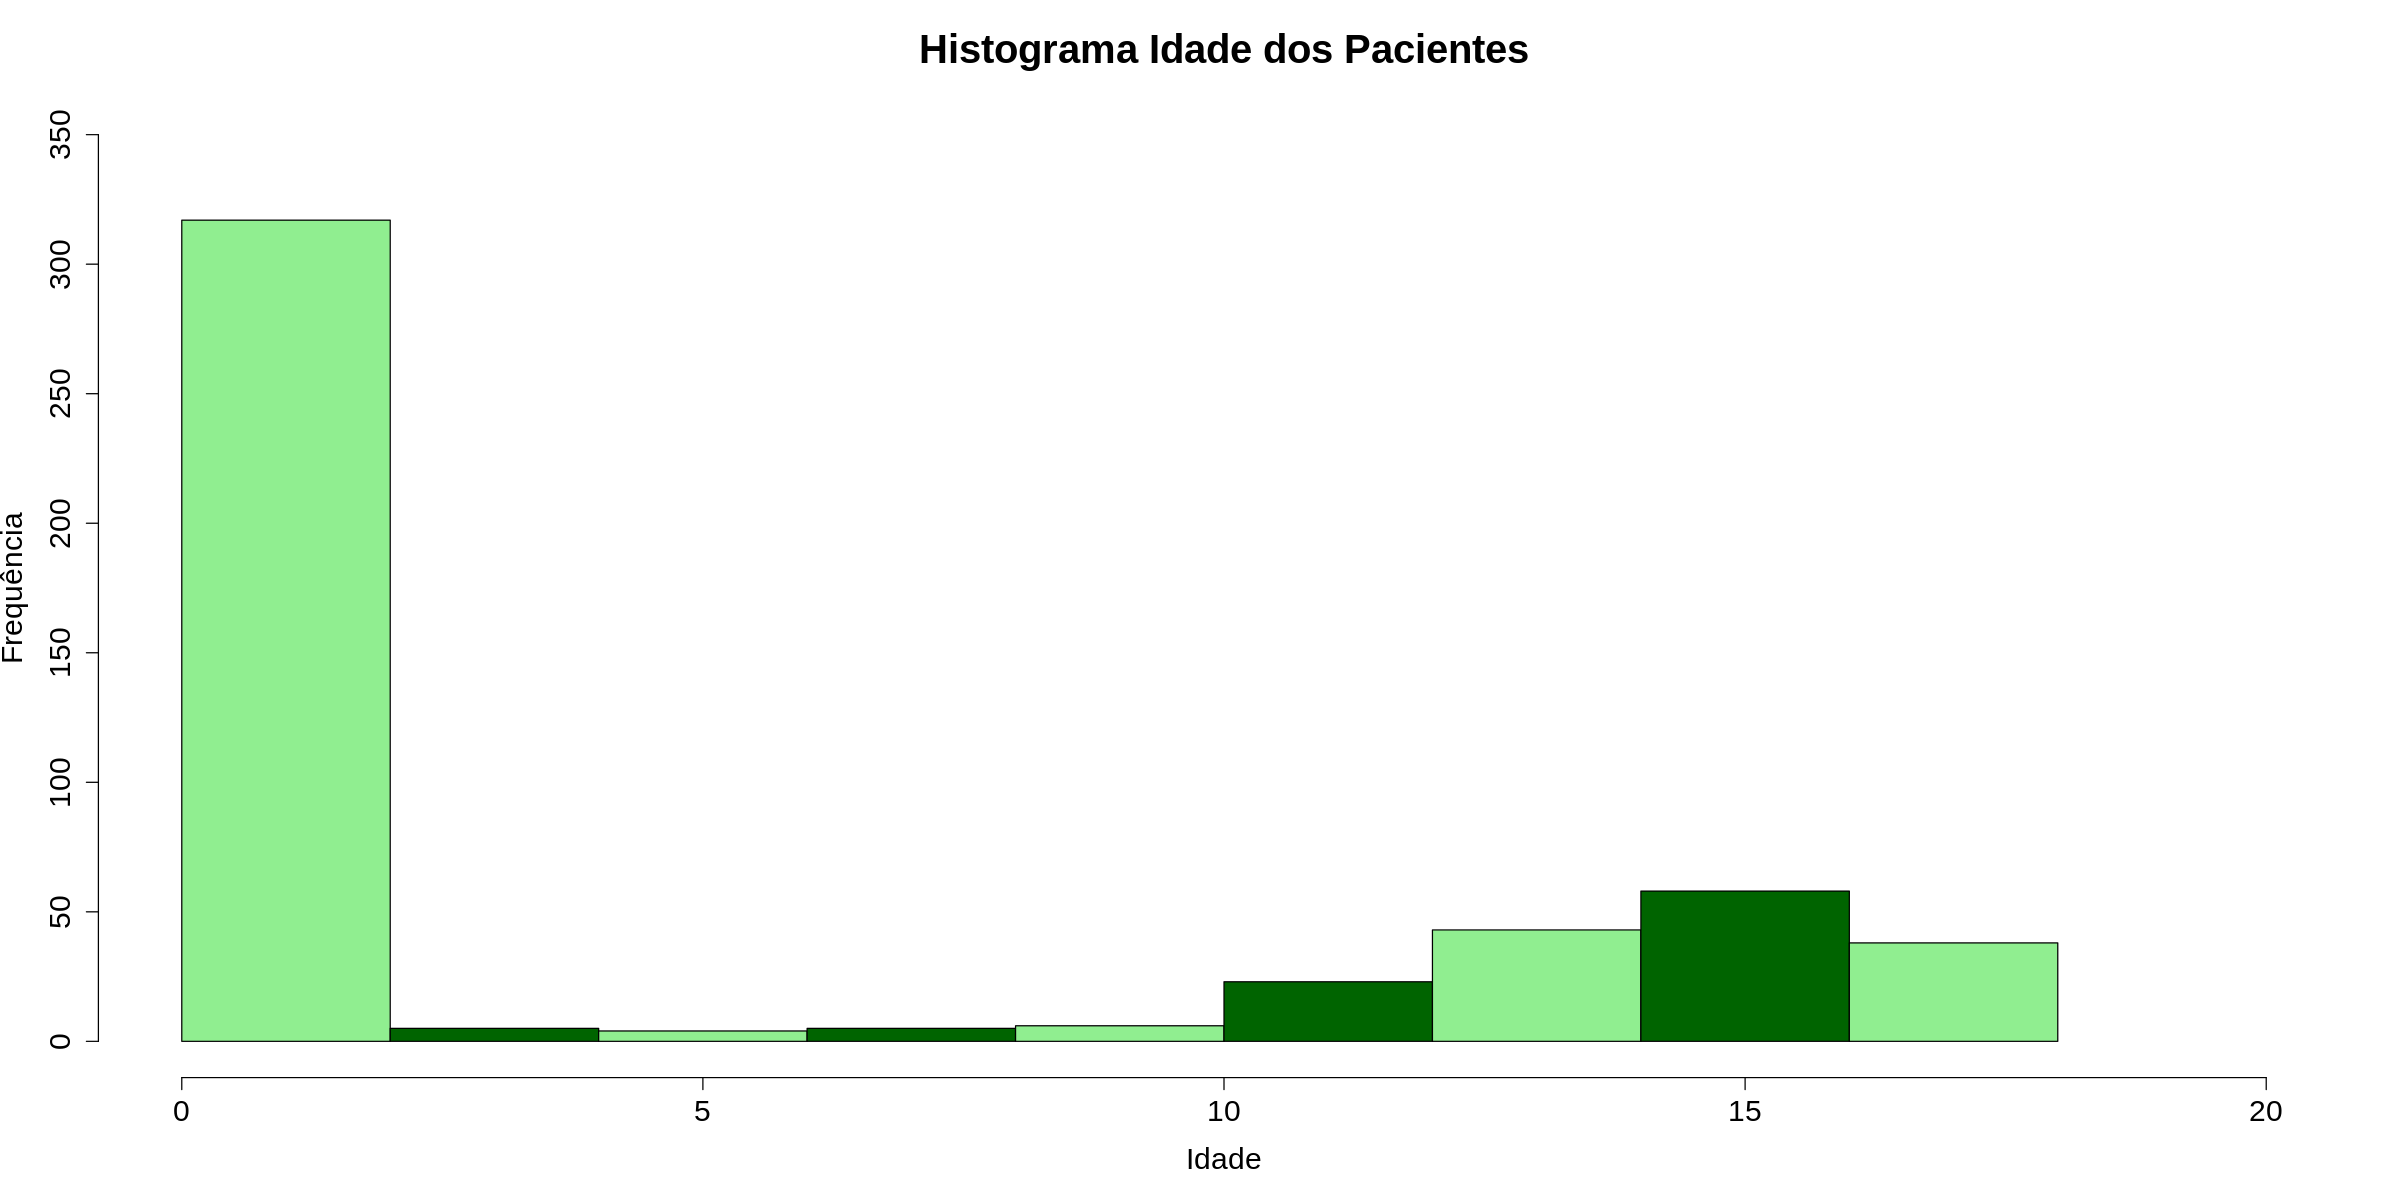

In [ ]:
# 1.Qual a distribuição da idade dos pacientes que frequentam o hospital?
hist(df$Idade,
      main = 'Histograma Idade dos Pacientes',
      xlab = 'Idade',
      ylab = 'Frequência',
      border = 'black',
      col = c('light green','dark green'),
      xlim = c(0,20),
      ylim = c(0,350),
      cex.main = 2,
      cex.lab = 1.5,
      cex.axis = 1.5
)

Crianças entre 0 e 1 são as que mais frequentam o hospital

In [ ]:
# 2. Qual faixa etária tem o maior gasto total no hospital?
df1 <- df %>% group_by(Idade) %>% summarise('Total' = sum(Custo))
df1

Idade,Total
<int>,<int>
0,676962
1,37744
2,7298
3,30550
4,15992
5,18507
6,17928
7,10087
8,4741


In [ ]:
# Ou utilizando o data.table
install.packages('data.table')
library('data.table')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [ ]:
# Transformando o df em data.table
df_table <- data.table(df)

# Calculando as agregações
df_IdadeMaior <- df_table[,.('Total'= sum(Custo)),by=Idade][order(-Total)]
df_IdadeMaior[df_IdadeMaior$Total == max(df_IdadeMaior$Total),]

Idade,Total
<int>,<int>
0,676962


In [ ]:
# 3. Qual grupo baseado em diagnóstico (Aprdrg) tem o maior gasto total no hospital?
df_MaiorGasto <- df_table[,.('Total' = sum(Custo)),by=GrupoDiagnostico][order(-Total)]
max_df_MaiorGasto <- df_MaiorGasto[df_MaiorGasto$Total == max(df_MaiorGasto$Total)]
sprintf('O grupo %s tem o maior gasto total, equivalente a %s',max_df_MaiorGasto$GrupoDiagnostico, max_df_MaiorGasto$Total)

[1] "O grupo 640 tem o maior gasto total, equivalente a 436822"

In [ ]:
# 4. A raça do paciente tem relação com o total gasto em internações no hospital?
# Será utilizado o teste ANOVA

# dependente: Custo
# Independente: Raca
# Pois queremos determinar se o Custo tem relação com a Raça

# Teste de Hipótese:
# H0: Não há efeito da Raca em Custo
# H1: Há efeito da Raca em Custo

summary(as.factor(df_table$Raca))
modelo_v1 <- aov(Custo ~ Raca, data = df_table)
summary(modelo_v1)

1   2   3   4   5   6 
484   6   1   3   3   2

             Df     Sum Sq  Mean Sq F value Pr(>F)
Raca          1    2488459  2488459    0.16   0.69
Residuals   497 7539623326 15170268               

Como p-value é maior que o nível de significância (5%), não podemos rejeitar H0. Portanto, provavelmente não há efeito da Raca em Custo.

In [ ]:
# 5. A combinação de idade e gênero dos pacientes influencia no gasto total em internações no hospital?

# dependente: Custo
# Independente: Idade, éFeminino

# Teste de Hipótese
# H0: Não há efeito de Idade, Gênero em Custo
# H1: Há efeito de de Idade, Gênero em Custo

modelo_v2 <- aov(Custo ~ Idade + éFeminino, data = df_table)
summary(modelo_v2)

             Df     Sum Sq   Mean Sq F value Pr(>F)   
Idade         1  129749266 129749266    8.76 0.0032 **
éFeminino     1   65219972  65219972    4.40 0.0364 * 
Residuals   496 7347142546  14812787                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Como p-value para as duas variáveis (Idade e Gênero) é menor que 5%, portanto, rejeita-se H0, logo, há efeito de idade e gênero nos gastos de internações do hospital.

In [ ]:
# 6. Como o tempo de permanência é o fator crucial para pacientes internados, desejamos descobrir se o tempo de permanência pode ser previsto a partir de idade, gênero e raça.

# Usaremos Regressão Linear
# Dependente: TempoInternacao
# Independete: Idade, éFeminino, Raca

# Teste de hipótese
# H0: Não há relação linear entre as variáveis dependentes e independentes
# H1: Há relação linear entre as variáveis dependentes e independentes

modelo_v3 <- lm(TempoInternacao ~ Idade + éFeminino + Raca, data=df_table)
summary(modelo_v3)



Call:
lm(formula = TempoInternacao ~ Idade + éFeminino + Raca, data = df_table)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.22  -1.22  -0.85   0.15  37.78 

Coefficients:
            Estimate Std. Error t value         Pr(>|t|)    
(Intercept)   2.9438     0.3932    7.49 0.00000000000032 ***
Idade        -0.0396     0.0223   -1.77            0.077 .  
éFeminino     0.3701     0.3102    1.19            0.233    
Raca         -0.0941     0.2931   -0.32            0.748    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.4 on 495 degrees of freedom
Multiple R-squared:  0.0079,	Adjusted R-squared:  0.00189 
F-statistic: 1.31 on 3 and 495 DF,  p-value: 0.269


Como p-value das três variáveis são maiores que 5%, então falhamos em rejeitar H0, logo, provavelmente não há relação linerar entre as variáveis dependentes e independentes. Não podemos prever o TempoInternação com base nas variáveis independentes.

In [ ]:
# 7. Quais variável têm maior impacto nos custos de internação hospitalar?

# Usaremos Regressão Linear
# Dependente: Custo
# Independentes: .

# H0: não há relação linear entre as variáveis indenpendentes e dependente
# H1: Há relação linear entre as variáveis independentes e dependentes

modelo_v4 <- lm(Custo ~ ., data=df_table)
summary(modelo_v4)


Call:
lm(formula = Custo ~ ., data = df_table)

Residuals:
   Min     1Q Median     3Q    Max 
 -6377   -700   -174    122  43378 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)      5218.677    507.647   10.28 < 0.0000000000000002 ***
Idade             134.695     17.471    7.71     0.00000000000007 ***
éFeminino        -390.692    247.739   -1.58                 0.12    
TempoInternacao   743.152     34.923   21.28 < 0.0000000000000002 ***
Raca             -212.429    227.933   -0.93                 0.35    
GrupoDiagnostico   -7.791      0.682  -11.43 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2610 on 493 degrees of freedom
Multiple R-squared:  0.554,	Adjusted R-squared:  0.549 
F-statistic:  122 on 5 and 493 DF,  p-value: <0.0000000000000002


As variáveis Idade, TempoInternação e GrupoDiagnóstico possuem maior impacto nos custos do hospital, pois apresentam p-value < 0.05, logo, falhamos em reijeitar a hipótese nula H0 e provavelmente há relação linear entre essas variáveis independentes e a variável dependente (Custo)

In [ ]:
# Removendo a variável Raca, com baixa significância
modelo_v5 <- lm(Custo ~ Idade + TempoInternacao + GrupoDiagnostico + éFeminino, data=df_table)
summary(modelo_v5)


Call:
lm(formula = Custo ~ Idade + TempoInternacao + GrupoDiagnostico + 
    éFeminino, data = df_table)

Residuals:
   Min     1Q Median     3Q    Max 
 -6344   -687   -168    132  43387 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)      4971.980    433.116   11.48 < 0.0000000000000002 ***
Idade             134.241     17.462    7.69    0.000000000000082 ***
TempoInternacao   743.618     34.914   21.30 < 0.0000000000000002 ***
GrupoDiagnostico   -7.767      0.681  -11.40 < 0.0000000000000002 ***
éFeminino        -383.082    247.571   -1.55                 0.12    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2610 on 494 degrees of freedom
Multiple R-squared:  0.553,	Adjusted R-squared:  0.549 
F-statistic:  153 on 4 and 494 DF,  p-value: <0.0000000000000002


In [ ]:
# Removendo a variável éFeminino, com baixa significância
modelo_v6 <- lm(Custo ~ Idade + TempoInternacao + GrupoDiagnostico, data=df_table)
summary(modelo_v6)


Call:
lm(formula = Custo ~ Idade + TempoInternacao + GrupoDiagnostico, 
    data = df_table)

Residuals:
   Min     1Q Median     3Q    Max 
 -6603   -719   -169    124  43350 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)      4960.170    433.658   11.44 < 0.0000000000000002 ***
Idade             128.552     17.095    7.52     0.00000000000026 ***
TempoInternacao   740.806     34.916   21.22 < 0.0000000000000002 ***
GrupoDiagnostico   -8.006      0.664  -12.05 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2620 on 495 degrees of freedom
Multiple R-squared:  0.551,	Adjusted R-squared:  0.548 
F-statistic:  202 on 3 and 495 DF,  p-value: <0.0000000000000002


Portanto, o modelo_v6 apresenta melhor performance. As variáveis Idade, TemporInternacao e GrupoDiagnostico possuem maiores impactos nos custos hospitalares.